# <center><font color='OrangeRed'>Аналитика в авиакомпании</font></center>

Главная цель моего анализа - исследование предпочтений клиентов авиакомпании "F9", покупающих билеты на разные направления. 
Авиакомпания "F9" - российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. 

Иследование будет проходить по следующему плану:

1. Парсинг данных
2. Обзор данных и их предобработка:
    - Импорт библиотек;
    - Первичная предобработка данных:
        - Обработка пропусков,
        - Обработка дубликатов    
    - Общая информация о данных;
3. Исследовательский анализ данных:
    - Анализ распределения данных;
    - Построение графиков по основным показателям;
    - ТОП10 городов по количеству рейсов;
    - Связи основных показателей по авиаперевозкам;
4. Общий вывод.

# <font style="background-color: Cyan; color=black">Парсинг данных</font> #

В предыдущем задании мною был произведен парсинг данных, на основе которого я могу сделать следующие выводы:
1. Количество вылетов из каждого аэропорта находится в *широком* диапазоне (от **34** до **6376**), что говорит о том, что загруженность аэропортов сильно различается между собой. Это не удивляет, так как загруженность аэропорта зависит и от города, где расположен (крупнее город - больше рейсов)

2. Количество рейсов для аждой модели самолета:
    - Суммарное количество для всех моделей самолета Airbus - **1567**
    - Суммарное количество для всех моделей самолета Boeing - **1530**
    - Суммарное количество для остальных моделей самолетов (Bombardier, Cessna, Sukhoi) - **13188**

3. Было подсчитано среднее количество прибывающих рейсов в день для каждого города за август 2018 года (данные будут использованы в датасете для анализа)

4. Мною были изучены фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выделялись: Park Live в тридцатую неделю, Пикник Афиши в тридцать первую неделю и Видфест в тридцать шестую неделю.

5. Подсчитаны купленные за каждую неделю билеты с 23 июля по 30 сентября 2018 года с номером недели, отметкой и названием о проходящем фестивале. Предварительный результат - фестивали практически не влияют на спрос пассажиров.

# <font style="background-color: Cyan; color=black">Обзор данных и их предобработка</font> #

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('/datasets/query_1.csv')
display(flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Пропусков и дубликатов в этом датасете нет, можно с ним работать.

In [4]:
flights.describe().round(2)

,flights_amount
count,8.00
mean,2035.62
std,1965.20
min,300.00
25%,605.25
50%,795.00
75%,4250.25
max,4557.00


Методом describe получили данные, в которых присутсвует большой разброс данных. Вероятно, это связано с тем, что некоторые модели относятся к одному типу воздушного судна (Boeing и Airbus). Если бы я суммировал эти полеты вне зависимости от марки), то разброс был бы меньше.

In [5]:
fcity = pd.read_csv('/datasets/query_3.csv')
fcity=fcity.round(2)
fcity.sample(10)

,city,average_flights
75,Ставрополь,2.00
40,Махачкала,3.29
16,Воронеж,2.00
57,Ноябрьск,3.00
23,Иркутск,6.03
29,Киров,6.00
12,Владивосток,3.00
8,Благовещенск,1.00
99,Якутск,2.74
18,Горно-Алтайск,1.39


In [6]:
fcity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
fcity.isna().sum()

city               0
average_flights    0
dtype: int64

In [8]:
fcity.duplicated().sum()

0

Пропусков и дубликатов нет. Типы данных подходящие. 

In [9]:
fcity.describe().round(2)

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


В этих данных тоже присутствует большой разброс данных. Но, как я и предполагал выше, это может быть связано с городом, где находится аэропорт.

<font color='Red'>Вывод:</font> Для исследоваия буду использовать два датафрейма с данными о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года и данными о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. Пропусков и дубликатов в них нет, тип данных подходящий

# <font style="background-color: Cyan; color=black">Исследовательский анализ данных</font> #

# <font color='blue'>Анализ распределения данных</font> #

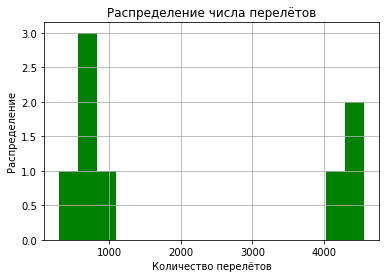

In [10]:
flights.hist(bins=16, color='green')
plt.title('Распределение числа перелётов')
plt.xlabel('Количество перелётов')
plt.ylabel('Распределение')
plt.show()

Полученное распределение отличается от нормального и пуассоновского. Вероятно, это связано с тем, что у меня взята за основу сводная таблицу с данными о моделях и полётах, которая является очень маленькой выборкой.

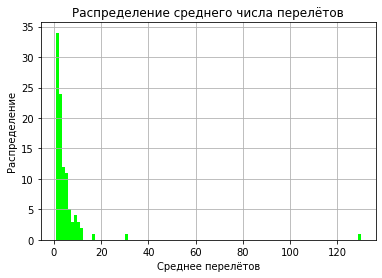

In [11]:
fcity.hist(bins=101, color='Lime')
plt.title('Распределение среднего числа перелётов')
plt.xlabel('Среднее перелётов')
plt.ylabel('Распределение')
plt.show()

Распределение похоже на пуассоновское с длинным хвостом из разрозненных значений, которые, как я предполагал выше, могут быть связаны с городами, где находятся аэропорты (Москва, Санкт-Петербург).
Посмотрю на данные без длинного "хвоста"

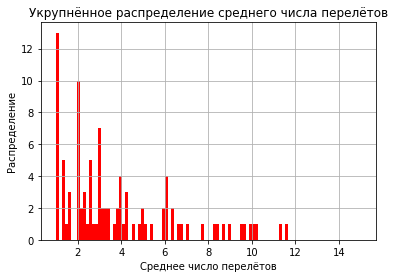

In [13]:
fcity.hist(bins=101, range=(1,15), color='Red')
plt.title('Укрупнённое распределение среднего числа перелётов')
plt.xlabel('Среднее число перелётов')
plt.ylabel('Распределение')
plt.show()

С помощью этого графика можно заметить, что в большинстве городов количество рейсов в день не отличается (**1 - 3**). 
Есть часть городов с количеством рейсом **4 - 6**. И несколько городов с более высокими показателями.

Именно такие города и попадут в ТОП-10 по количеству рейсов. 

# <font color='blue'>ТОП-10 городов по количеству рейсов</font> #

In [14]:
top = fcity.sort_values(by='average_flights', ascending=False).reset_index(drop=True).head(10)
top

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


Было бы удивительно, если бы первое место занимала не Москва. Здесь много аэропортов, столица России, главный пересадочный узел для полетов зарубеж.
Следом идет Санкт-Петербург (тоже не удивительно), потому что второй город после Москвы.
Новосибирск и Красноярск по праву занимают 3 и 4 места, так как является главными городами с аэропортом для своего региона.
Удивило, что Сочи занимает только **9 место**, так как это один из главных (если не главный) курортный город страны, куда летает очень много людей

# <font color='blue'>Построение графиков по основным показателям</font> #

<font color='green'>Количество рейсов для каждой модели самолетов в сентябре 2018 года</font>

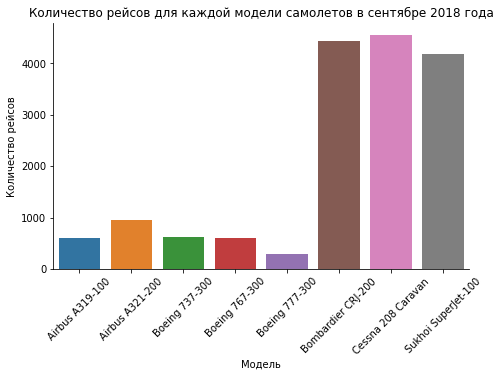

In [15]:
plot = sns.catplot("model", "flights_amount", kind="bar", data=flights)
plt.title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
plt.xlabel('Модель')
plt.ylabel('Количество рейсов')
plot.set_xticklabels(rotation=45)
plot.fig.set_size_inches(8,4)
plt.show()

Как было отмечено ранее, у самолетов Airbus и Boeing представлено несколько моделей в данной авиакомпании в анализируемый период. Количество рейсов на Airbus A319-100, Boeing 737-300 и Boeing 767-300 практически одинаково (около **600** рейсов). В два раза меньше рейсов на самолётах модели Boeing 777-300 (300 рейсов); 960 рейсов на Airbus A321-200. И в несколько раз большее количество рейсов в самолётах моделей Sukhoi SuperJet-100 (4185 рейсов), а также Bombardier CRJ-200 и Cessna 208 Caravan (4446 рейсов и 4557 рейсов, соответственно).

Эти данные полностью отражают политику авиакомпании:
1. Модели Sukhoi SuperJet-100, Bombardier CRJ-200 находятся в одном классе. Это самолеты среднемагистральные, малой вместительности (до 100 пассажиров). Рейсы продолжительностью не более 3 часов. Таких рейсов у авиакомпании больше всего, потому что им это выгодно
2. Airbus A321-200 - можель самолета, пришедшая на смену A319-100. У него больше пассажирских мест, увеличенная дальность полетов. Такие самолеты могут летать более 3 часов (Boeing 737-300 также относится к этому классу). Это символизирует о том, что таких рейсов, средней дальности, у компании гораздо меньше, чем рейсов в другие города.
3. Boeing 777-300 и Boeing 767-300 - дальнемагистральные самолеты. Рейсов на таких самолетах и не может быть много, только если компания не специализируется исключительно на дальние направления. Но, как мы знаем, авиакомпания "F9" выполняет **внутренние** пассажирские перевозки
4. Cessna 208 Caravan - легкий, маленький самолет (вместимость около 10 человек). Предназначен на небольшие расстояния

Следовательно, так как основное направление деятельности авиакомпании внутренние перевозки, то и экономически выгодно использовать на больших направлениях самолеты, которые не потребляют много топлива. И выпускать на рейс небольшие самолеты, которые будут более заполнены, чем полетит полупустой Airbus A321-200
Предполагаю, что Airbus A321-200, Boeing 737-300 и Airbus A319-100 авиакомпания использует для полетов из/в города из топ-4.

<font color='green'>Города и количество рейсов</font>

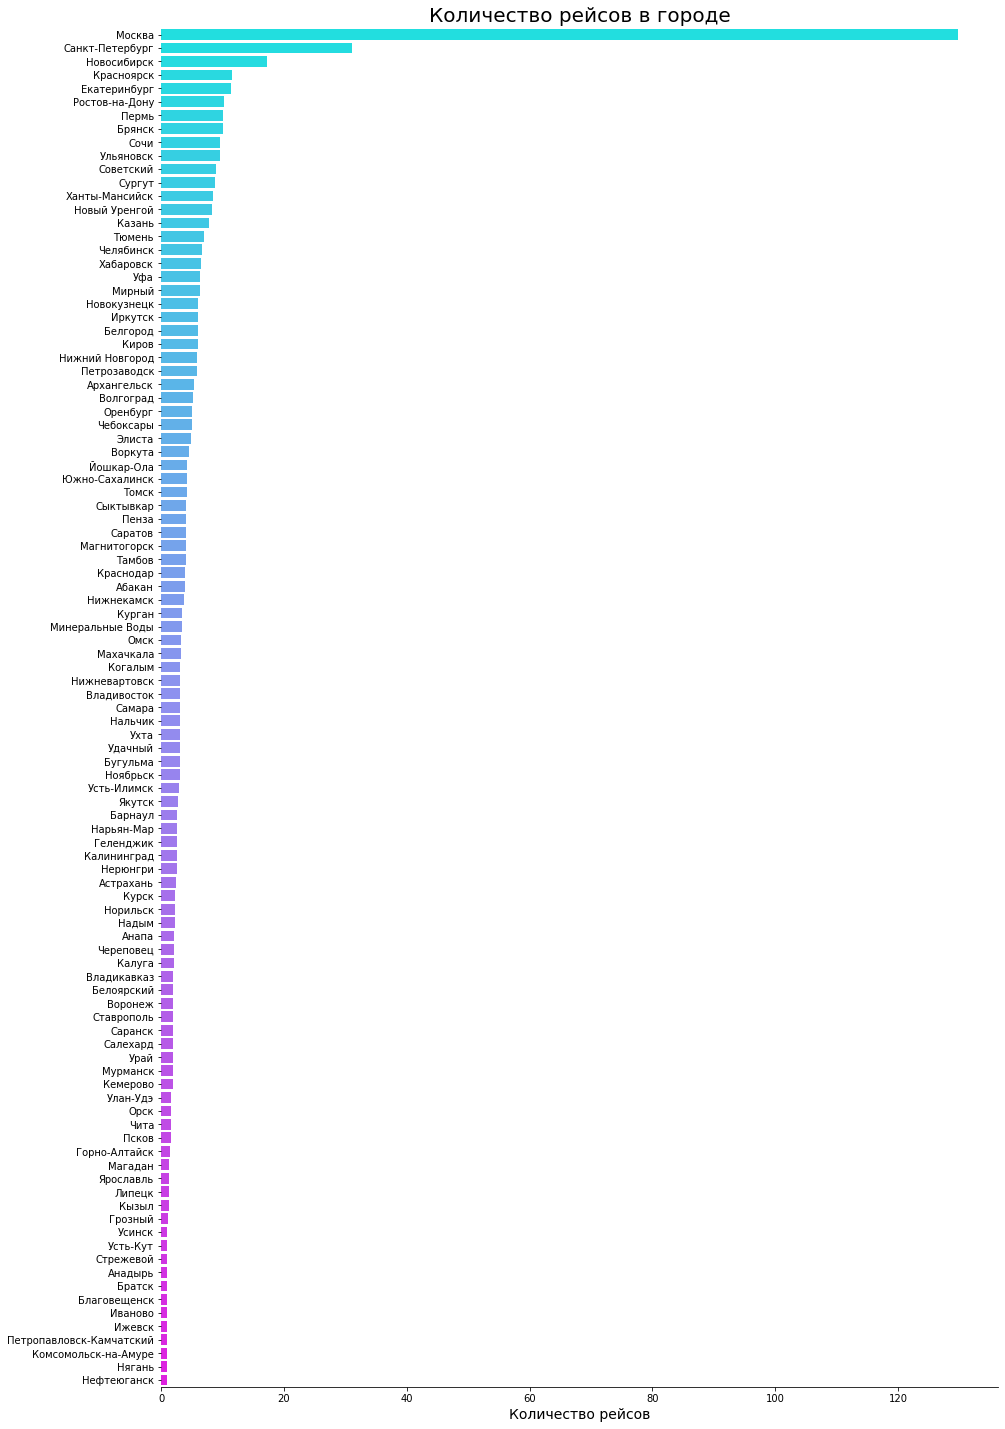

In [16]:
cities = fcity.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Количество рейсов в городе', fontsize=20)
sns.barplot(x='average_flights', y='city', data=cities, palette='cool')
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('Количество рейсов', fontsize=14)
plt.show()

Как было замечено и ранее - по городам лидирует столица, в остальных городах перелетов мало, в среднем не больше 5

<font color='green'>ТОП-10 городов по количеству рейсов</font>

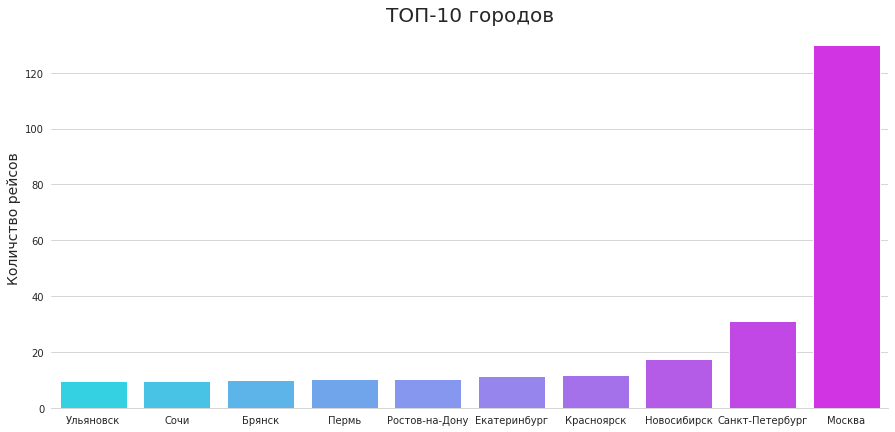

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('ТОП-10 городов', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top.sort_values(by='average_flights', ascending=True), palette='cool')
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('Количство рейсов', fontsize=14)
plt.show()

Тройка лидеров очевидна - Москва, Санкт-Петербург, Новосибирск. В остальных городах попавших в ТОП-10 всего около 10 перелетов

<font color='Red'>Вывод:</font> С помощью графиков я подтвердил свои предположения, что самыми популярными направлениями являются Москва, Санкт-Петербург и Новосибирск. 
Больше всего рейсов проходит на самолетах Sukhoi SuperJet-100, Bombardier CRJ-200 и Cessna 208 Caravan. Это обхяснимо, так как затраты на рейсы на таких самолетах гораздо меньше, чем на имеющихся у компании Boeing и Airbus

# <font style="background-color: Cyan; color=black">Общий вывод</font> #

Ислледование было проведено мною по следующим этапам:
 - парсинг данных,
 - предварительный анализ данных,
 - общая информация о датасетах,
 - подготовка данных,
 - исследовательского анализа данных.
 
С помощью парсинга данных я получил информацию об авиакомпании по следующим показателям:
   - количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года,
   - среднем количестве прибывающих рейсов в день для каждого города за август 2018 года

Предварительный анализ базы данных об авиаперевозках показал, что загруженность аэропортов сильно различается между собой. Количество рейсов на каждой модели самолёта также различно (в особенности среди ближне-, средне- и дальнемагистральных самолетов). 
Также по результатам предварительного анализа можно предположить, что проведение фестивалей не влияет на спрос пассажиров.

Анализ общей информации об имеющихся данных показал, что у нас имеется две исходные таблицы с данными о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года и данными о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. В данных о количестве рейсов по моделям самолётов очень большой разброс: от 300 до 4557 рейсов. Такой разброс может быть связан с тем, что некоторые модели относятся к одному типу воздушного судна (Boeing и Airbus). Соответственно, при укрупнённом анализе (если бы мы сравнивали количество полётов для самолётов разного производства, но вне зависимости от марки), разброс не был бы таким большим. В данных о количестве рейсов по городам также имеется очень большой разброс: от 1 до 130 рейсов в день. Такой разброс связан с тем, что максимальное значение характерно для города, являеющегося хабом (города, в котором сосредоточено очень большое число стыковочных рейсов в другие города).

Результаты исследовательского анализа данных:
- ТОП-10 городов по количеству рейсов - лидерами, что не удивляет, являются Москва (столица, центральный пересадочный хаб) и Санкт-Петербург (северная столица, второй по привлекательности город). Тройку замыкает Новосибирск, который пользуется бешеной популярностью как воздушная гавань у жителей ближайших городов. В данном показатели удивило 9 место Сочи, который является одним из самых популярных городов для жителей России
- Количество рейсов на разных моделях самолетов - было выявлено, что наибольшая "активность" у небольших самолетов (Sukhoi, Bombardier, Cessna) - это связано с политикой авиакомпании, которая занимается внутренними перевозками, в том числе и в особенности, между небольшими городами на небольшом расстоянии 
- Среднее количество рейсов в день - в большинстве городов количество рейсов в день не отличается (1 - 3). Есть часть городов с количеством рейсом 4 - 6. И несколько городов с более высокими показателями.